                              COMP_TOP1_10_4.csv            COMP_TOP2_10_4.csv            COMP_TOP3_10_4.csv            
------------------------------------------------------------------------------------------------------------------------
SNR (dB)                      11.0                          8.89                          12.58                         
Peak Frequency (Hz)           12.5                          12.5                          12.5                          
Peak Power (dB/Hz)            -84.93                        -83.49                        -81.14                        
Average Noise Power (dB/Hz)   -95.93                        -92.39                        -93.72                        
Peak 50Hz Power (dB/Hz)       -36.67                        -30.89                        -31.09                        
SSVEP to 50Hz Ratio (dB)      -48.25                        -52.6                         -50.05                        


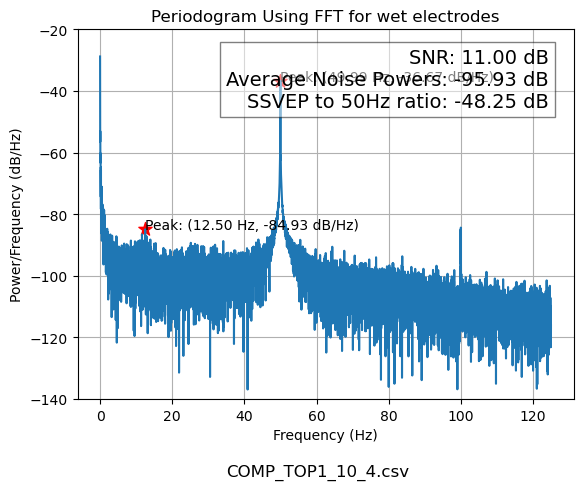

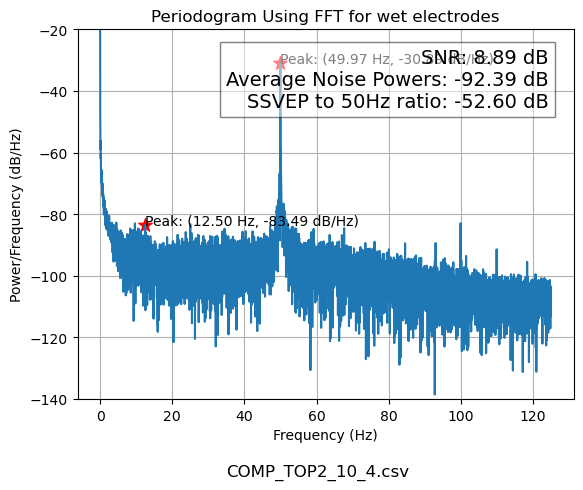

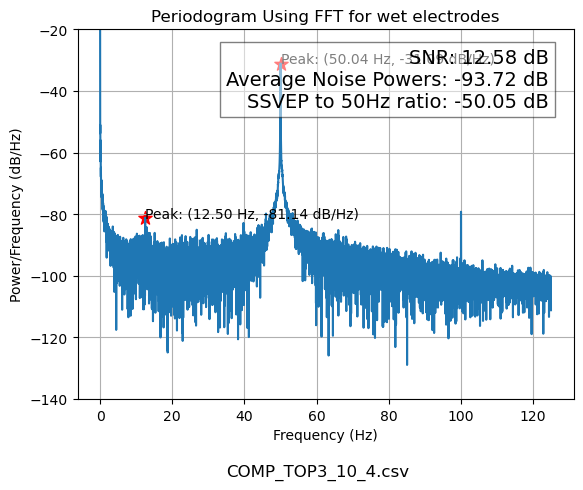

In [42]:
# main.py
import os
from module_reloader import reload_module

reload_module('parameters_calculation')

from parameters_calculation import calculate_parameters, plot_results

# array to save the results
results = []

#Access the data files stored in GitHub. These data are not related to the cloned functions. 
#You can copy the address and use them directly on your own computer. Or you can continue editing this notebook file for use.
base_dir = "https://raw.githubusercontent.com/dingruochen/EEG_data/main/Measurements-10_04"
file_names = [
    "COMP_TOP1_10_4.csv",
    "COMP_TOP2_10_4.csv",
    "COMP_TOP3_10_4.csv"
]
file_paths = [os.path.join(base_dir, file_name) for file_name in file_names]

for file_path in file_paths:
    result = calculate_parameters(file_path, column_index=1, start_from=2)
    if result:
        snr, peak_freq, peak_power, noise_power_avg, peak_50Hz_power, SSVEP_50Hz_Ratio, freq_full, psdx_full, peak_50Hz_full = result
        
        results.append([os.path.basename(file_path), round(snr, 2), round(peak_freq, 2), round(peak_power, 2), round(noise_power_avg, 2), round(peak_50Hz_power, 2), round(SSVEP_50Hz_Ratio, 2)])

headers = ["File Name", "SNR (dB)", "Peak Frequency (Hz)", "Peak Power (dB/Hz)", "Average Noise Power (dB/Hz)", "Peak 50Hz Power (dB/Hz)", "SSVEP to 50Hz Ratio (dB)"]

column_width = 30

# print column name
print("".ljust(column_width), end="")
for result in results:
    print(result[0].ljust(column_width), end="")
print("\n" + "-" * (column_width * (len(results) + 1)))

# print resluts
for i in range(1, len(headers)):
    print(headers[i].ljust(column_width), end="")
    for result in results:
        print(str(result[i]).ljust(column_width), end="")
    print()

# plot
for file_path in file_paths:
    result = calculate_parameters(file_path, column_index=1, start_from=2)
    if result:
        snr, peak_freq, peak_power, noise_power_avg, peak_50Hz_power, SSVEP_50Hz_Ratio, freq_full, psdx_full, peak_50Hz_full = result
        
        plot_results(freq_full, psdx_full, peak_freq, 10 ** (peak_power / 10), peak_50Hz_full, 10 ** (peak_50Hz_power / 10), snr, 10 ** (noise_power_avg / 10), SSVEP_50Hz_Ratio, file_name=os.path.basename(file_path), plot_title="Periodogram Using FFT for wet electrodes", y_range=(-140, -20))